In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, MultipleLocator, ScalarFormatter, AutoLocator
from matplotlib.path import Path
from matplotlib.patches import BoxStyle
import seaborn as sns
import datetime
import locale

In [2]:
# Read the data from Johns Hopkins
conf_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_df = pd.read_csv(conf_url)

death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(death_url)

In [3]:
# Population per country 2018 (data from https://www.nordicstatistics.org/population/)

swe_pop = 10120242
nor_pop = 5295619
den_pop = 5781190

In [4]:
# Extract the Scandinavian countries and combine to a dataframe
scandic = ["Sweden", "Norway", "Denmark"]
scandic_conf_df = confirmed_df[confirmed_df["Country/Region"].isin(scandic)]
scandic_deaths_df = deaths_df[deaths_df["Country/Region"].isin(scandic)]

In [5]:
# Drop not used columns
scandic_conf_df = scandic_conf_df.drop(["Province/State","Lat", "Long"], axis=1).groupby("Country/Region").sum()
scandic_deaths_df = scandic_deaths_df.drop(["Province/State","Lat", "Long"], axis=1).groupby("Country/Region").sum()

In [6]:
scandic_conf_df.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Denmark               0        0        0        0        0        0        0   
Norway                0        0        0        0        0        0        0   
Sweden                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  11/8/20  11/9/20  11/10/20  \
Country/Region                             ...                               
Denmark               0        0        0  ...    55635    56406     57472   
Norway                0        0        0  ...    24732    25325     25887   
Sweden                0        0        0  ...   146461   146461    162240   

                11/11/20  11/12/20  11/13/20  11/14/20  11/15/20  11/16/20  \
Country/Region                                                               
Denmark            58466     59478     60515     61593     62652     63847   
Norway             26511     27228     27916     28434     28434     28434   
Sweden            166707    171365    177355    177355    177355    177355   

                11/17/20  
Country/Region            
Denmark            65067  
Norway             30114  
Sweden            192439  

[3 rows x 301 columns]

In [7]:
scandic_deaths_df.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Denmark               0        0        0        0        0        0        0   
Norway                0        0        0        0        0        0        0   
Sweden                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  11/8/20  11/9/20  11/10/20  \
Country/Region                             ...                               
Denmark               0        0        0  ...      743      747       750   
Norway                0        0        0  ...      285      285       285   
Sweden                0        0        0  ...     6022     6022      6057   

                11/11/20  11/12/20  11/13/20  11/14/20  11/15/20  11/16/20  \
Country/Region                                                               
Denmark              753       755       756       757       760       764   
Norway               285       291       294       294       294       294   
Sweden              6082      6122      6164      6164      6164      6164   

                11/17/20  
Country/Region            
Denmark              768  
Norway               298  
Sweden              6225  

[3 rows x 301 columns]

In [8]:
# Create lists from the dataframe to use in creation of long dataframe
dates = scandic_conf_df.keys()

mortality_rate_swe = []
mortality_rate_nor = []
mortality_rate_den = []

sweden_cases = []
sweden_deaths = []

norway_cases = []
norway_deaths = []

denmark_cases = []
denmark_deaths = []

uk_cases = []
uk_deaths = []

for i in dates:
    sweden_sum = scandic_conf_df[i]["Sweden"]
    norway_sum = scandic_conf_df[i]["Norway"]
    denmark_sum = scandic_conf_df[i]["Denmark"]
    #death_sum = deaths[i].sum()
    sweden_death_sum = scandic_deaths_df[i]["Sweden"]
    norway_death_sum = scandic_deaths_df[i]["Norway"]
    denmark_death_sum = scandic_deaths_df[i]["Denmark"]
                                               
    sweden_cases.append(sweden_sum)
    norway_cases.append(norway_sum)
    denmark_cases.append(denmark_sum)

    #total_deaths.append(death_sum)
    sweden_deaths.append(sweden_death_sum)
    norway_deaths.append(norway_death_sum)
    denmark_deaths.append(denmark_death_sum)
    
    mortality_rate_swe.append(sweden_death_sum/sweden_sum)
    mortality_rate_nor.append(norway_death_sum/norway_sum)
    mortality_rate_den.append(denmark_death_sum/denmark_sum)

In [9]:
print(len(scandic_deaths_df.keys()))
print(len(mortality_rate_swe))
print(len(mortality_rate_nor))
print(len(mortality_rate_den))

301
301
301
301


In [10]:
mortality_rate = pd.DataFrame({"Date": scandic_deaths_df.keys(),"Sweden": mortality_rate_swe, "Norway": mortality_rate_nor, "Denmark": mortality_rate_den})
mortality_rate["Date"] = pd.to_datetime(mortality_rate["Date"])
mortality_rate.set_index("Date", inplace=True)
mortality_rate.tail()

Sweden    Norway   Denmark
Date                                    
2020-11-13  0.034755  0.010532  0.012493
2020-11-14  0.034755  0.010340  0.012290
2020-11-15  0.034755  0.010340  0.012130
2020-11-16  0.034755  0.010340  0.011966
2020-11-17  0.032348  0.009896  0.011803

In [11]:
# Make dataframe that starts from a value of confirmed cases

#above5 S: 36, N: 37, D: 41
#above100 S: 44, N: 45, D: 48

s5 = 36
s100 = 44
n5 = 37
n100 = 44
d5 = 41
d100 = 48

scandi_outbreak = pd.DataFrame({"Sweden": sweden_cases[s5:], "Norway": norway_cases[n5:] + (len(sweden_cases[s5:]) - len(norway_cases[n5:])) * [None],
                                "Denmark": denmark_cases[d5:] + (len(sweden_cases[s5:]) - len(denmark_cases[d5:])) * [None],})
scandi_outbreak.head()

Sweden  Norway  Denmark
0       3     6.0      6.0
1      11    15.0     11.0
2      14    19.0     11.0
3      14    25.0     24.0
4      19    32.0     24.0

In [12]:
# Rearrange the confirmed dataframe to long format with date as index
d = {"Date": scandic_conf_df.keys(), "Sweden": sweden_cases, "Norway": norway_cases, "Denmark": denmark_cases}
scandic_df = pd.DataFrame(data=d)
scandic_df = scandic_df.melt(id_vars=["Date"], var_name="Country", value_name="Confirmed")
scandic_df["Date"] = pd.to_datetime(scandic_df["Date"], format="%m/%d/%y")
scandic_df.set_index("Date", inplace=True)

#scandic_df["2020-03-25":]

In [13]:
# Rearrange the deaths dataframe to long format with date as index
d = {"Date": scandic_deaths_df.keys(), "Sweden": sweden_deaths, "Norway": norway_deaths, "Denmark": denmark_deaths}
scandic_deaths_df = pd.DataFrame(data=d)
scandic_deaths_df = scandic_deaths_df.melt(id_vars=["Date"], var_name="Country", value_name="Deaths")
scandic_deaths_df["Date"] = pd.to_datetime(scandic_deaths_df["Date"])
scandic_deaths_df.set_index("Date", inplace=True)

# Calculate deaths per capita (per mille)
country_normalize = {"Sweden": swe_pop, "Norway": nor_pop, "Denmark": den_pop}
scandic_deaths_df["Pop"] = [country_normalize[x] for x in scandic_deaths_df["Country"]]
scandic_deaths_df["Deaths per capita"] = (scandic_deaths_df["Deaths"] / scandic_deaths_df["Pop"]) * 1000
scandic_deaths_df["Deaths per 100k"] = (scandic_deaths_df["Deaths"] / scandic_deaths_df["Pop"]) * 100000
scandic_deaths_df.drop("Pop", axis=1, inplace=True)

#scandic_deaths_df["2020-04-01":]

In [14]:
scandic_deaths_df["2020-03-29":].tail(20)

Country  Deaths  Deaths per capita  Deaths per 100k
Date                                                           
2020-10-29  Denmark     716           0.123850        12.384993
2020-10-30  Denmark     719           0.124369        12.436886
2020-10-31  Denmark     721           0.124715        12.471481
2020-11-01  Denmark     723           0.125061        12.506076
2020-11-02  Denmark     724           0.125234        12.523373
2020-11-03  Denmark     728           0.125926        12.592563
2020-11-04  Denmark     729           0.126099        12.609861
2020-11-05  Denmark     733           0.126791        12.679051
2020-11-06  Denmark     738           0.127655        12.765538
2020-11-07  Denmark     740           0.128001        12.800133
2020-11-08  Denmark     743           0.128520        12.852025
2020-11-09  Denmark     747           0.129212        12.921215
2020-11-10  Denmark     750           0.129731        12.973108
2020-11-11  Denmark     753           0.130250        13.025000
2020-11-12  Denmark     755           0.130596        13.059595
2020-11-13  Denmark     756           0.130769        13.076892
2020-11-14  Denmark     757           0.130942        13.094190
2020-11-15  Denmark     760           0.131461        13.146082
2020-11-16  Denmark     764           0.132153        13.215272
2020-11-17  Denmark     768           0.132845        13.284462

In [15]:
# Calculate the daily increase in cases and deaths and add them to the dataframes
diff_list = []
diff_death = []
rolling_7 = []
rolling_30 = []
for c in scandic_df["Country"].unique():
    diff_list.extend(scandic_df[scandic_df["Country"] == c]["Confirmed"].diff().values)
    diff_death.extend(scandic_deaths_df[scandic_deaths_df["Country"] == c]["Deaths"].diff().values)

len(diff_list)
scandic_df["Increase"] = diff_list
scandic_deaths_df["Increase"] = diff_death

for c in scandic_deaths_df["Country"].unique():
    rolling_7.extend(scandic_deaths_df[scandic_deaths_df["Country"] == c]["Increase"].rolling(7).mean())
    rolling_30.extend(scandic_deaths_df[scandic_deaths_df["Country"] == c]["Increase"].rolling(30).mean())
    
scandic_deaths_df["Rolling7"] = rolling_7
scandic_deaths_df["Rolling30"] = rolling_30

In [16]:
scandic_deaths_df["2020-03-01":].head(20)

Country  Deaths  Deaths per capita  Deaths per 100k  Increase  \
Date                                                                       
2020-03-01  Sweden       0           0.000000         0.000000       0.0   
2020-03-02  Sweden       0           0.000000         0.000000       0.0   
2020-03-03  Sweden       0           0.000000         0.000000       0.0   
2020-03-04  Sweden       0           0.000000         0.000000       0.0   
2020-03-05  Sweden       0           0.000000         0.000000       0.0   
2020-03-06  Sweden       0           0.000000         0.000000       0.0   
2020-03-07  Sweden       0           0.000000         0.000000       0.0   
2020-03-08  Sweden       0           0.000000         0.000000       0.0   
2020-03-09  Sweden       0           0.000000         0.000000       0.0   
2020-03-10  Sweden       1           0.000099         0.009881       1.0   
2020-03-11  Sweden       1           0.000099         0.009881       0.0   
2020-03-12  Sweden       2           0.000198         0.019762       1.0   
2020-03-13  Sweden       3           0.000296         0.029644       1.0   
2020-03-14  Sweden       5           0.000494         0.049406       2.0   
2020-03-15  Sweden       7           0.000692         0.069168       2.0   
2020-03-16  Sweden       8           0.000790         0.079049       1.0   
2020-03-17  Sweden      14           0.001383         0.138337       6.0   
2020-03-18  Sweden      21           0.002075         0.207505       7.0   
2020-03-19  Sweden      30           0.002964         0.296436       9.0   
2020-03-20  Sweden      38           0.003755         0.375485       8.0   

            Rolling7  Rolling30  
Date                             
2020-03-01  0.000000   0.000000  
2020-03-02  0.000000   0.000000  
2020-03-03  0.000000   0.000000  
2020-03-04  0.000000   0.000000  
2020-03-05  0.000000   0.000000  
2020-03-06  0.000000   0.000000  
2020-03-07  0.000000   0.000000  
2020-03-08  0.000000   0.000000  
2020-03-09  0.000000   0.000000  
2020-03-10  0.142857   0.033333  
2020-03-11  0.142857   0.033333  
2020-03-12  0.285714   0.066667  
2020-03-13  0.428571   0.100000  
2020-03-14  0.714286   0.166667  
2020-03-15  1.000000   0.233333  
2020-03-16  1.142857   0.266667  
2020-03-17  1.857143   0.466667  
2020-03-18  2.857143   0.700000  
2020-03-19  4.000000   1.000000  
2020-03-20  5.000000   1.266667

In [17]:
# Calculate 7 day rolling average for deaths
mean_list = []
for c in scandic_df["Country"].unique():
    mean_list.extend(scandic_df[scandic_df["Country"] == c]["Confirmed"].rolling(7).mean())

print(len(mean_list))
scandic_df["Mean7"] = mean_list

#scandic_df["2020-04-05":]

903


In [18]:
class ExtendedTextBox(BoxStyle._Base):
    """
    An Extended Text Box that expands to the axes limits 
                        if set in the middle of the axes
    """

    def __init__(self, pad=0.3, width=500.):
        """
        width: 
            width of the textbox. 
            Use `ax.get_window_extent().width` 
                   to get the width of the axes.
        pad: 
            amount of padding (in vertical direction only)
        """
        self.width=width
        self.pad = pad
        super(ExtendedTextBox, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        x0 and y0 are the lower left corner of original text box
        They are set automatically by matplotlib
        """
        # padding
        pad = mutation_size * self.pad

        # we add the padding only to the box height
        height = height + 2.*pad
        # boundary of the padded box
        y0 = y0 - pad
        y1 = y0 + height
        _x0 = x0
        x0 = _x0 +width /2. - self.width/2.
        x1 = _x0 +width /2. + self.width/2.

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path

In [19]:
# Set date intervals for plots

from_date = "2020-02-25"
to_date = ""
if to_date == "":
    to_date = str(scandic_df.index[-1].date())
    
# Set Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "1.0", "grid.color": ".95", "grid.linestyle": "--"})

# Background color
bg_col = "floralwhite"

# Set line width
l_w = 3

# Calculate number of countries in dataframe
num_countries = len(scandic_df["Country"].unique())

# register the custom textbox style
BoxStyle._style_list["ext"] = ExtendedTextBox

In [20]:
# Old textbox
"""
# Create and display infotext
textstr = '\n'.join((
    "ci = standard deviation",
    f"Latest data: {scandic_df.index[-1].date()}",
    "Source: CSSE at Johns Hopkins University"))
props = dict(boxstyle='round', facecolor='salmon', alpha=0.5)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
"""

'\n# Create and display infotext\ntextstr = \'\n\'.join((\n    "ci = standard deviation",\n    f"Latest data: {scandic_df.index[-1].date()}",\n    "Source: CSSE at Johns Hopkins University"))\nprops = dict(boxstyle=\'round\', facecolor=\'salmon\', alpha=0.5)\nax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,\n        verticalalignment=\'top\', bbox=props)\n'

In [21]:
scandic_df[scandic_df["Country"] == "Sweden"][from_date:to_date].shape

(267, 4)

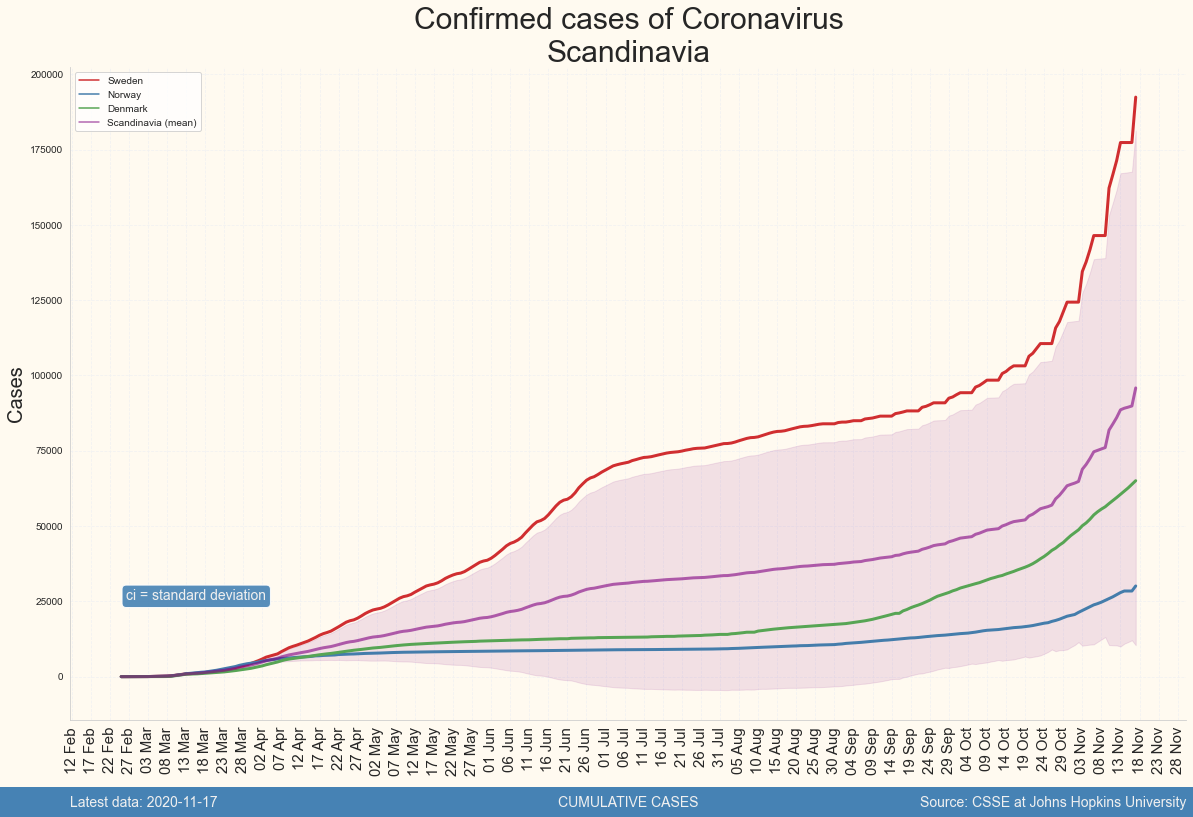

In [22]:
# Plot confirmed cases
fig, ax = plt.subplots(figsize=(20,12))

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
sns.lineplot(x=scandic_df[from_date:to_date].index, y="Confirmed", data=scandic_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot Sweden rolling mean
#sns.lineplot(x=scandic_df[scandic_df["Country"] == "Sweden"][from_date:to_date].index, y="Mean7", data=scandic_df[scandic_df["Country"] == "Sweden"][from_date:to_date], color="salmon", alpha=.6)

# Plot Scandinavian mean
sns.lineplot(x=scandic_df[from_date:to_date].index, y="Confirmed", data=scandic_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")



# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=range(0,7,2)))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));


#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Format confidence interval
ax.get_children()[0].set_alpha(.1)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)
    #print(l, ax.lines[l].get_color())

# Create and display infotext
textstr = "ci = standard deviation"
# bbcol = ax.lines[7].get_color()
props = dict(boxstyle='round', facecolor="steelblue", alpha=.9)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0", verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title('Confirmed cases of Coronavirus\nScandinavia', size=30)

#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Cases', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)


# The signature bar
offset = 7
#str1 = f"Latest data: {scandic_df.index[-1].date()}. Fetched at {datetime.datetime.utcnow():%Y-%m-%d %H:%M} UTZ"
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = "CUMULATIVE CASES", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")


# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_conf" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

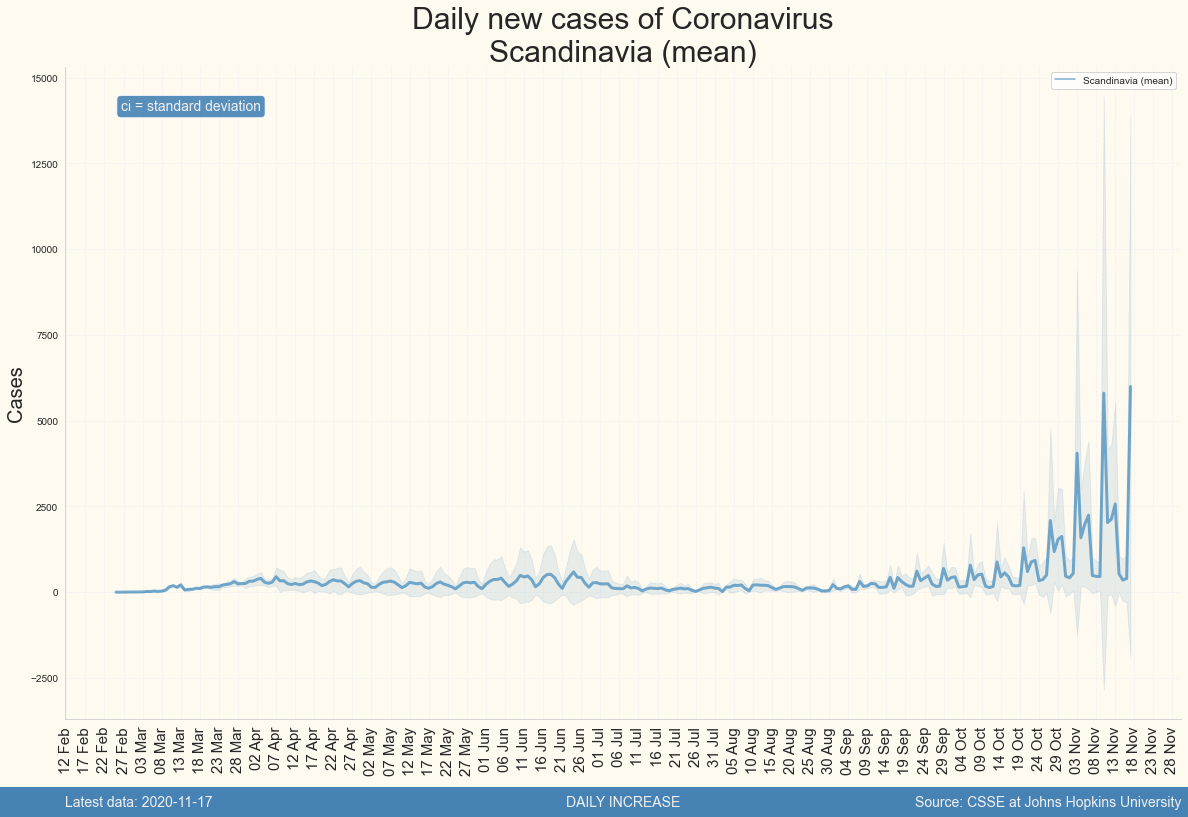

In [23]:
# Plot daily new cases
fig, ax = plt.subplots(figsize=(20,12))

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
#sns.lineplot(x=scandic_df[from_date:].index, y="Increase", data=scandic_df[from_date:], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot Scandinavian mean
sns.lineplot(x=scandic_df[from_date:].index, y="Increase", data=scandic_df[from_date:], label="Scandinavia (mean)", alpha=.6, ci="sd")

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Format confidence interval
ax.get_children()[0].set_alpha(.1)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Create and display infotext
textstr = "ci = standard deviation"
props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0",verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title('Daily new cases of Coronavirus\nScandinavia (mean)', size=30)

#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Cases', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
offset = 6
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
#print(ax.get_ylim())
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = "DAILY INCREASE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_new_daily" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

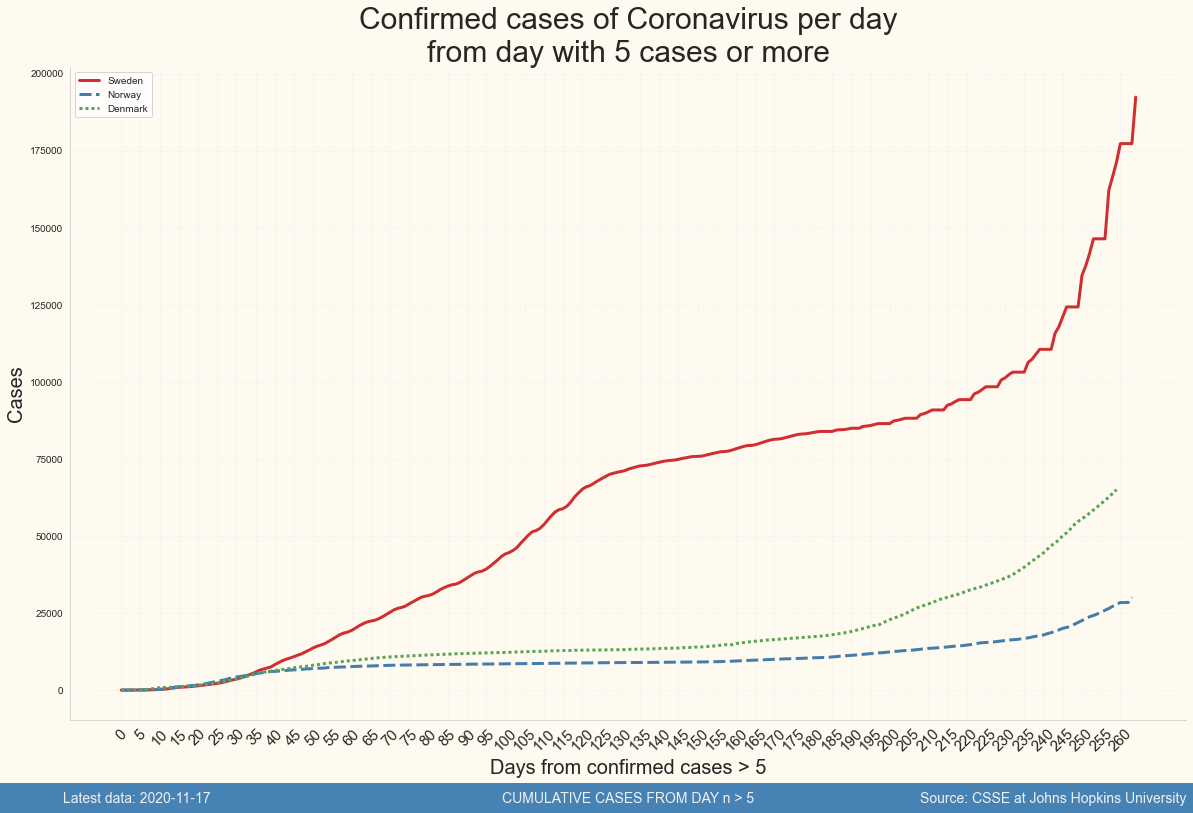

In [24]:
# Plot confirmed cases from day with X cases
fig, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=scandi_outbreak, palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8))

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Set title and axis parameters
plt.title('Confirmed cases of Coronavirus per day\nfrom day with 5 cases or more', size=30)

plt.xlabel('Days from confirmed cases > 5', size=20)
plt.ylabel('Cases', size=20)

# Format xticks
plt.xticks(range(0, len(scandi_outbreak), 5), size=15, rotation=45)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Position legend
plt.legend(loc="upper left")

# The signature bar
offset = 3.8
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0]-2, y = ax.get_ylim()[0]*offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_window_extent().width*2)

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*offset,
                    s = "CUMULATIVE CASES FROM DAY n > 5", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_conf_outbreak" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

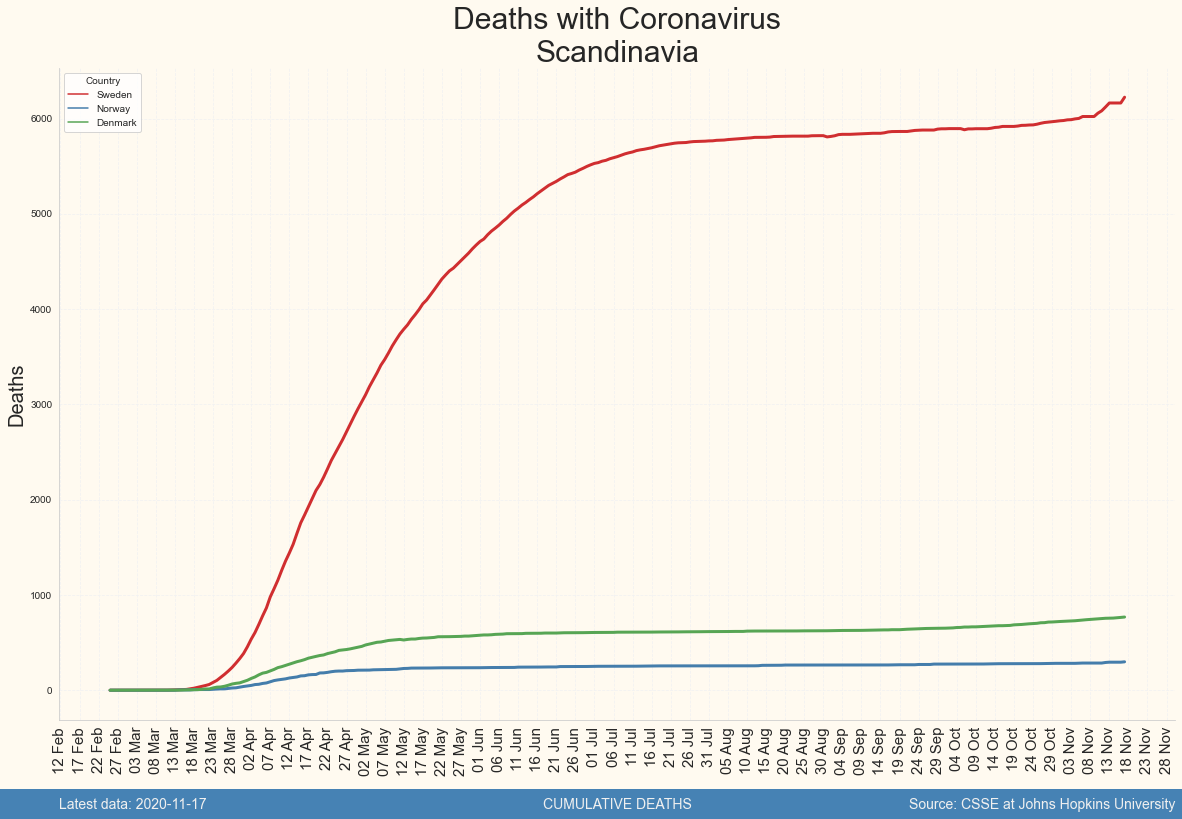

In [25]:
# Plot deaths
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = False
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    
    # Create and display infotext
    textstr = "ci = standard deviation"
    props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
    ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
            color="#f0f0f0", verticalalignment='top', bbox=props)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)



# Set title and axis parameters
plt.title('Deaths with Coronavirus\nScandinavia', size=30)


#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
offset = 4
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*offset,
                    s = "CUMULATIVE DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_deaths" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

Sweden     0.081138
Norway     0.021408
Denmark    0.034889
dtype: float64


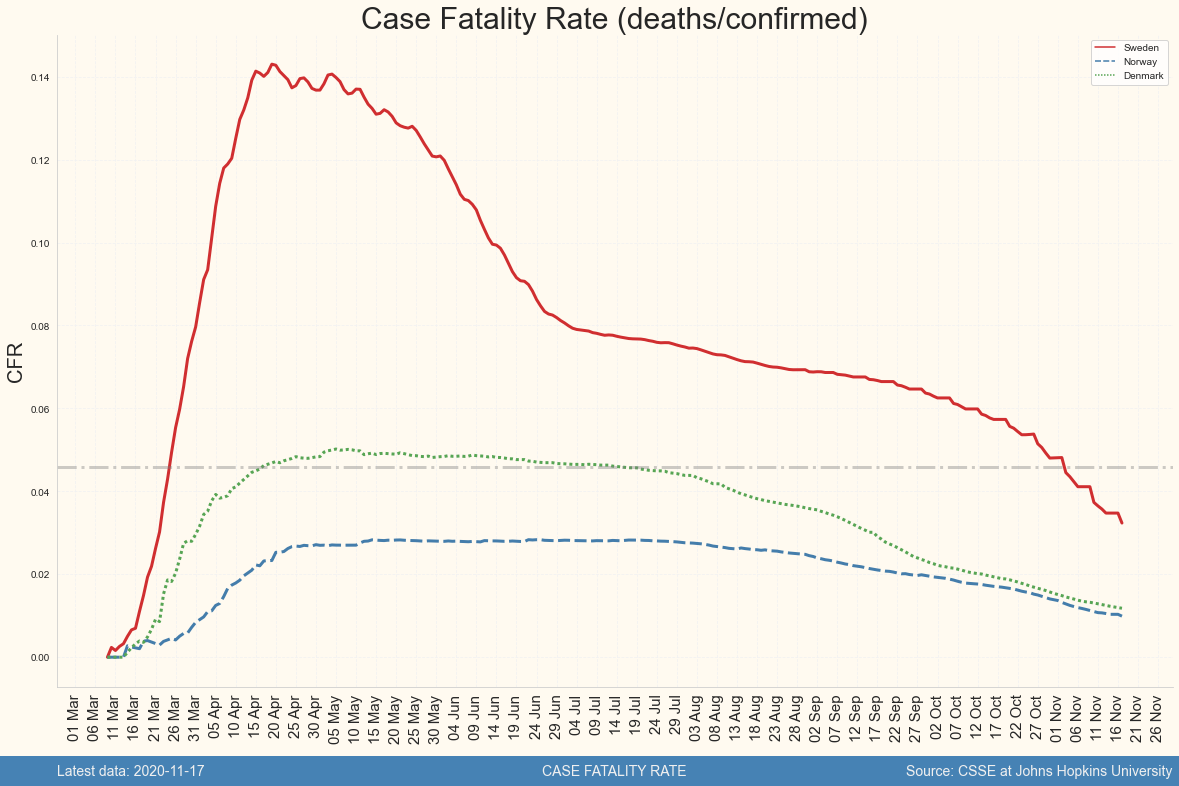

In [26]:
## Den här är letalitet (case fatality rate) och inte mortalitet (mortality).
## CFR är andelen av insjuknade som dör medans mortalitet är andel av populationen

# Plot Case Fatality Rate
fig, ax = plt.subplots(figsize=(20,12))

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

f_d = 47
genomsnitt = np.mean(mortality_rate[["Sweden", "Norway", "Denmark"]][f_d:])
print(genomsnitt)
sns.lineplot(data=mortality_rate[f_d:], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8))
#sns.lmplot(x=scandic_deaths_df.index.unique()[f_d:], y=mortality_rate_swe[f_d:])
ax.axhline(genomsnitt.mean(), linestyle="-.", color="grey", alpha=.4)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=range(0,7)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))

#ax.lines[0].set_linestyle("--")
#ax.lines[0].set_alpha(.5)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Format x-ticks
plt.xticks(rotation=90, size=15)

# Set title and axis parameters
plt.title("Case Fatality Rate (deaths/confirmed)", size=30)
#plt.xlabel("Date", size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel("CFR", size=20)

# The signature bar
offset = 4
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*offset,
                    s = "CASE FATALITY RATE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Show plot
sns.despine()
plt.show()

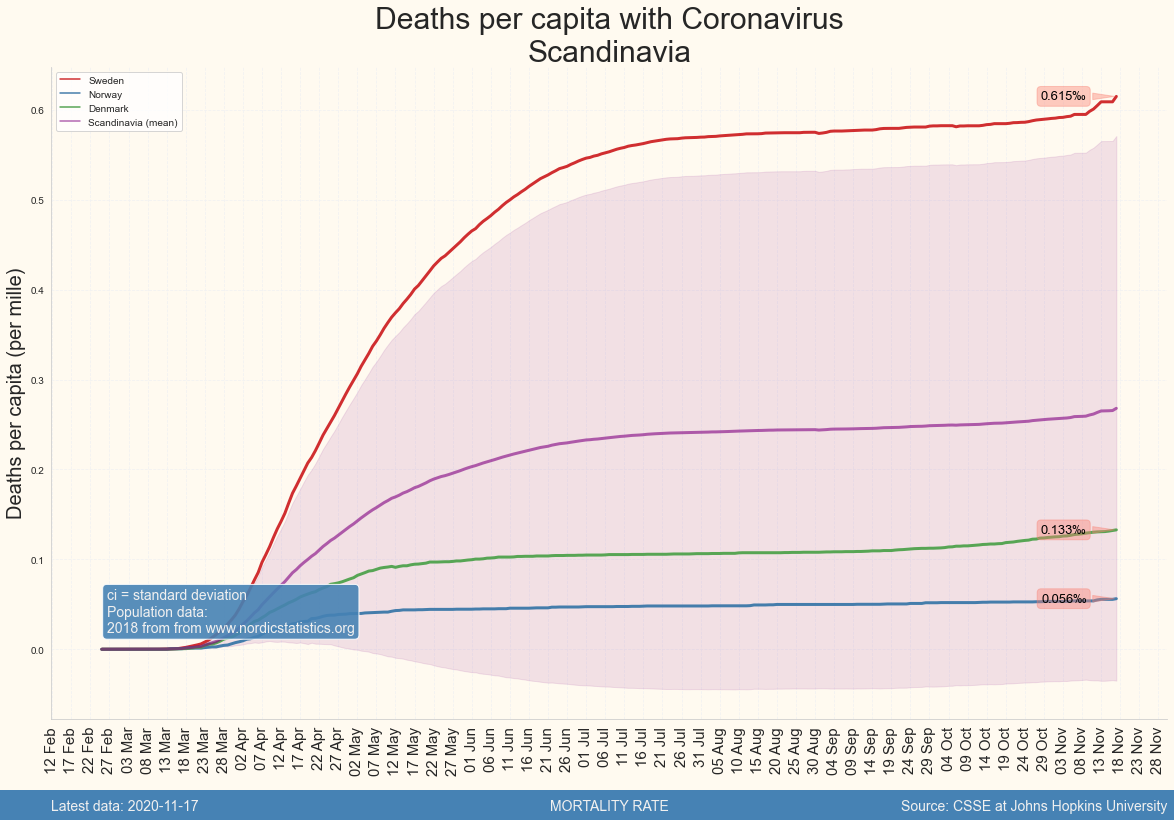

In [27]:
## Denna är mortalitet

# Plot deaths per capita
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per capita", data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = True
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per capita", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    textstr = "ci = standard deviation\n"

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Create and display infotext
textstr = textstr + "Population data:\n2018 from from www.nordicstatistics.org"
props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0", verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title("Deaths per capita with Coronavirus\nScandinavia", size=30)

#plt.xlabel("Date", size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel("Deaths per capita (per mille)", size=20)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Format xticks
plt.xticks(rotation=90, size=15)

# Find last values
swe_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Sweden"]["Deaths per capita"][-1]
nor_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Norway"]["Deaths per capita"][-1]
den_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Denmark"]["Deaths per capita"][-1]

# Add annotations
ann_col = "salmon"
txt_col = "black"
alpha = .4
ax.annotate(str(round(swe_last_dpc,3)) + "‰", xy=(scandic_deaths_df.index[-1], swe_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ann_col),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ann_col), color=txt_col)
ax.annotate(str(round(nor_last_dpc,3)) + "‰", xy=(scandic_deaths_df.index[-1], nor_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ann_col),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ann_col), color=txt_col)
ax.annotate(str(round(den_last_dpc,3)) + "‰", xy=(scandic_deaths_df.index[-1], den_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ann_col),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ann_col), color=txt_col)

# The signature bar
offset = 2.3

str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*offset,
                    s = "MORTALITY RATE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today())+ "_scandinavia_dpc" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

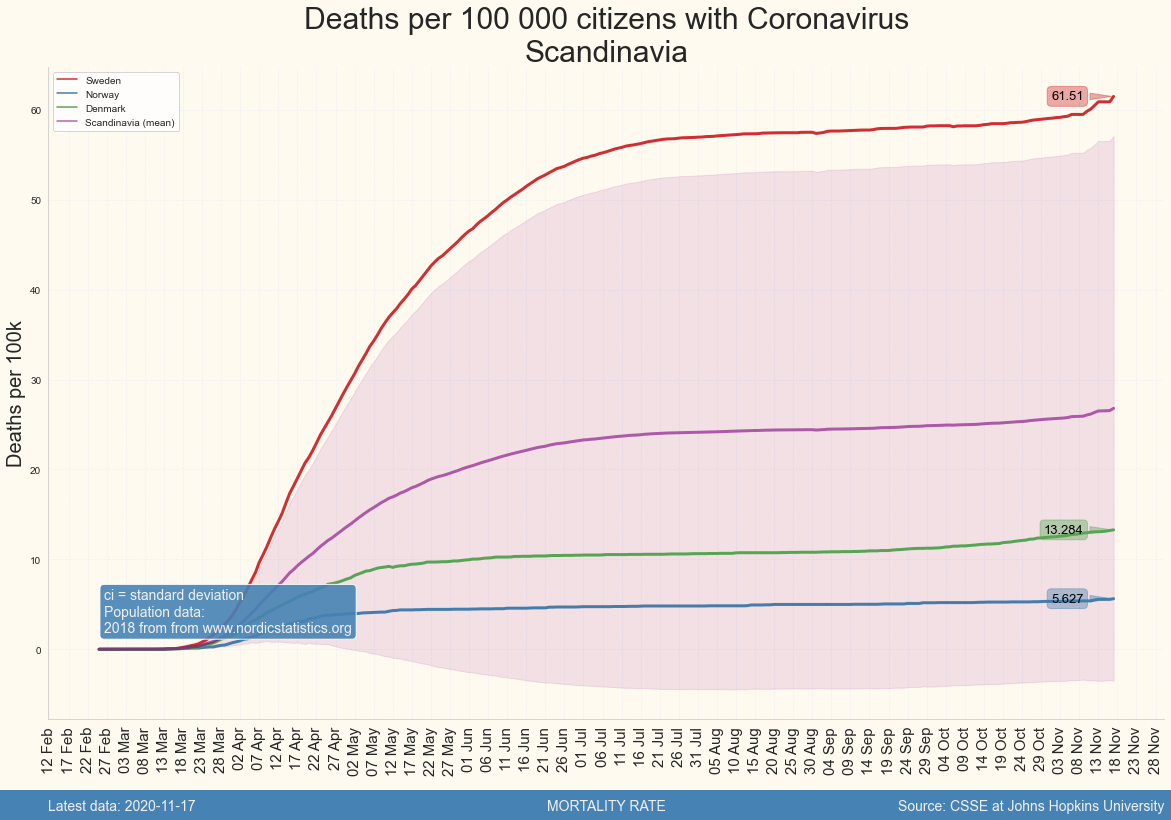

In [28]:
## Denna är också mortalitet men per 100k istället för per 1k

# Plot deaths per capita
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per 100k", data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = True
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths per 100k", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    textstr = "ci = standard deviation\n"

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Create and display infotext
textstr = textstr + "Population data:\n2018 from from www.nordicstatistics.org"
props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
        color="#f0f0f0", verticalalignment='top', bbox=props)

# Set title and axis parameters
plt.title("Deaths per 100 000 citizens with Coronavirus\nScandinavia", size=30)

#plt.xlabel("Date", size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel("Deaths per 100k", size=20)

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Format xticks
plt.xticks(rotation=90, size=15)

# Find last values
swe_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Sweden"]["Deaths per 100k"][-1]
nor_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Norway"]["Deaths per 100k"][-1]
den_last_dpc = scandic_deaths_df[scandic_deaths_df["Country"] == "Denmark"]["Deaths per 100k"][-1]

# Add annotations
ann_col = "salmon"
txt_col = "black"
alpha = .4
ax.annotate(str(round(swe_last_dpc,3)), xy=(scandic_deaths_df.index[-1], swe_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ax.lines[0].get_color()),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ax.lines[0].get_color()), color=txt_col)
ax.annotate(str(round(nor_last_dpc,3)), xy=(scandic_deaths_df.index[-1], nor_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ax.lines[1].get_color()),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ax.lines[1].get_color()), color=txt_col)
ax.annotate(str(round(den_last_dpc,3)), xy=(scandic_deaths_df.index[-1], den_last_dpc),  xycoords="data",
             xytext=(-30, 0), textcoords="offset points",
             size=13, ha="right", va="center",
             bbox=dict(boxstyle="round", alpha=alpha, color=ax.lines[2].get_color()),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha, color=ax.lines[2].get_color()), color=txt_col)

# The signature bar
offset = 2.3
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*offset,
                    s = "MORTALITY RATE", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")



# Save as jpg and show plot
fname = str(datetime.date.today())+ "_scandinavia_dp100k" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

In [29]:
# Number of people difference between Sweden and Denmark 
(swe_pop * (swe_last_dpc)/100000) - (swe_pop * (den_last_dpc)/100000)

4880.580277416933

In [30]:
# Number of people difference between Denmark and Sweden
(den_pop * (swe_last_dpc)/100000) - (den_pop * (den_last_dpc)/100000)

2788.032331045048

In [31]:
scandic_deaths_df["2020-03-31":]

Country  Deaths  Deaths per capita  Deaths per 100k  Increase  \
Date                                                                        
2020-03-31   Sweden     385           0.038043         3.804257      53.0   
2020-04-01   Sweden     455           0.044959         4.495940      70.0   
2020-04-02   Sweden     535           0.052864         5.286435      80.0   
2020-04-03   Sweden     605           0.059781         5.978118      70.0   
2020-04-04   Sweden     690           0.068180         6.818019      85.0   
...             ...     ...                ...              ...       ...   
2020-11-13  Denmark     756           0.130769        13.076892       1.0   
2020-11-14  Denmark     757           0.130942        13.094190       1.0   
2020-11-15  Denmark     760           0.131461        13.146082       3.0   
2020-11-16  Denmark     764           0.132153        13.215272       4.0   
2020-11-17  Denmark     768           0.132845        13.284462       4.0   

             Rolling7  Rolling30  
Date                              
2020-03-31  40.285714  12.833333  
2020-04-01  45.857143  15.166667  
2020-04-02  52.714286  17.833333  
2020-04-03  57.714286  20.166667  
2020-04-04  64.428571  23.000000  
...               ...        ...  
2020-11-13   2.571429   2.700000  
2020-11-14   2.428571   2.666667  
2020-11-15   2.428571   2.766667  
2020-11-16   2.428571   2.833333  
2020-11-17   2.571429   2.933333  

[696 rows x 7 columns]

In [32]:
sweden_mortality_2018 = pd.read_csv("mortalitet_sverige_2018.csv", sep=";", decimal=",")
#sweden_mortality_2018.rename({" Antal döda per 100 000": "Deaths per 100k"}, axis=1, inplace=True, errors="raise")


In [33]:
sweden_mortality_2018.columns = sweden_mortality_2018.columns.str.strip()
sweden_mortality_2018.head()

DeathCause DeadPer100k  Total  \
0                                            Diagnos        2018    NaN   
1  A00­A09 Infektionssjukdomar utgående från mag­...        2,56    NaN   
2                                 A15­A19 Tuberkulos        0,15    NaN   
3          A20­A28 Vissa djurburna bakteriesjukdomar          ­­    NaN   
4     A80­A89 Virussjukdomar i centrala nervsystemet        0,35    NaN   

   Age0-85+  BothGender  2018  
0       NaN         NaN   NaN  
1       NaN         NaN   NaN  
2       NaN         NaN   NaN  
3       NaN         NaN   NaN  
4       NaN         NaN   NaN

In [34]:
sweden_mortality_2018.drop(["Total", "Age0-85+", "BothGender", "2018"], axis=1, inplace=True)

In [35]:
sweden_mortality_2018.replace("\xad\xad", np.nan, inplace=True)
sweden_mortality_2018.fillna(0, inplace=True)
sweden_mortality_2018["DeadPer100k"] = [str(x).replace(",", ".") for x in sweden_mortality_2018["DeadPer100k"]]

In [36]:
sweden_mortality_2018["DeadPer100k"] = pd.to_numeric(sweden_mortality_2018["DeadPer100k"])

In [37]:
sweden_mortality_2018.sort_values(by="DeadPer100k", axis=0, ascending=False, na_position="first").head(20)

DeathCause  DeadPer100k
0                                             Diagnos      2018.00
34  I20­I25 Ischemiska hjärtsjukdomar (sjukdomar o...       105.93
21  F00­F09 Organiska, inklusive symtomatiska, psy...        62.39
36                  I60­I69 Sjukdomar i hjärnans kärl        55.76
40     J40­J47 Kroniska sjukdomar i nedre luftvägarna        32.34
39             J09­J18 Influensa och lunginflammation        25.34
33  I10­I15 Hypertonisjukdomar (högt blodtryck och...        24.96
17                                   E10­E14 Diabetes        21.19
37  I70­I79 Sjukdomar i artärer, arterioler (småar...        16.48
95  X60­X84 Avsiktligt självdestruktiv handling (s...        12.46
83                                W00­W19 Fallolyckor        10.29
61                                  N17­N19 Njursvikt         8.85
48                         K70­K77 Sjukdomar i levern         8.35
35   I26­I28 Sjukdomstillstånd inom lungcirkulationen         5.65
93  X40­X49 Förgiftningsolyckor och exponering för...         5.12
49  K80­K87 Sjukdomar i gallblåsan, gallvägarna oc...         3.88
20                  E70­E90 Ämnesomsättningssjukdomar         3.86
43  K20­K31 Matstrupens, magsäckens och tolvfinger...         3.71
50     K90­K93 Andra sjukdomar i matsmältningsorganen         3.52
22  F10­F19 Psykiska störningar och beteendestörni...         2.94

In [38]:
scandic_deaths_df["logDeaths"] = scandic_deaths_df["Deaths"].apply(lambda x: np.log(x))
scandic_deaths_df.tail()

Country  Deaths  Deaths per capita  Deaths per 100k  Increase  \
Date                                                                        
2020-11-13  Denmark     756           0.130769        13.076892       1.0   
2020-11-14  Denmark     757           0.130942        13.094190       1.0   
2020-11-15  Denmark     760           0.131461        13.146082       3.0   
2020-11-16  Denmark     764           0.132153        13.215272       4.0   
2020-11-17  Denmark     768           0.132845        13.284462       4.0   

            Rolling7  Rolling30  logDeaths  
Date                                        
2020-11-13  2.571429   2.700000   6.628041  
2020-11-14  2.428571   2.666667   6.629363  
2020-11-15  2.428571   2.766667   6.633318  
2020-11-16  2.428571   2.833333   6.638568  
2020-11-17  2.571429   2.933333   6.643790

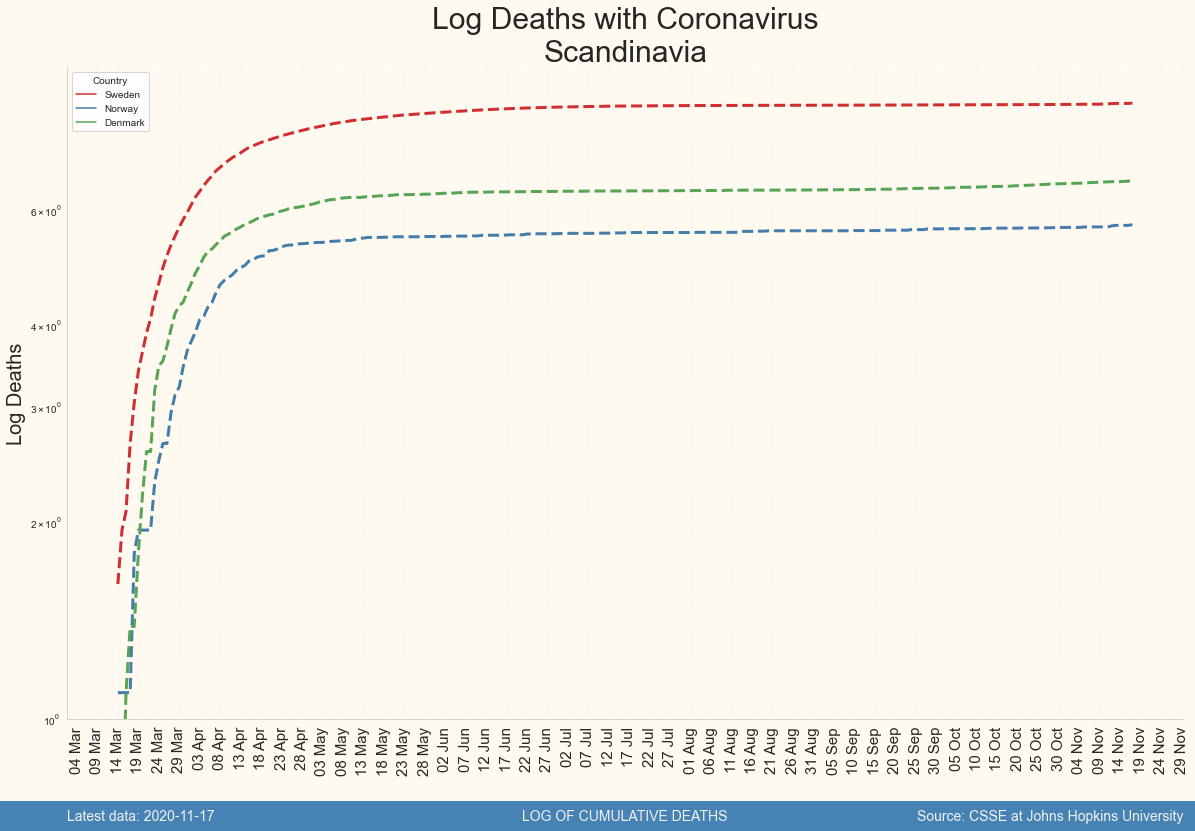

In [39]:
# Plot log of deaths
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""
from_date = "2020-03-14"

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y=scandic_deaths_df[from_date:to_date]["Deaths"].apply(lambda x: np.log(x)), data=scandic_deaths_df[from_date:to_date], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Plot mean if set to true
plot_mean = False
if plot_mean:
    # Plot Scandinavian mean
    sns.lineplot(x=scandic_deaths_df[from_date:to_date].index, y="Deaths", data=scandic_deaths_df[from_date:to_date], color="purple", label="Scandinavia (mean)", alpha=.6, ci="sd")

    # Format confidence interval
    ax.get_children()[0].set_alpha(.1)
    
    # Create and display infotext
    textstr = "ci = standard deviation"
    props = dict(boxstyle='round', facecolor='steelblue', alpha=.9)
    ax.text(0.05, 0.2, textstr, transform=ax.transAxes, fontsize=14,
            color="#f0f0f0", verticalalignment='top', bbox=props)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)
    ax.lines[l].set_linestyle("--")

# Set title and axis parameters
plt.title('Log Deaths with Coronavirus\nScandinavia', size=30)
ax.set(yscale="log")
ax.set_ylim(1e0,)
#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Log Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
offset = .7
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]*offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]*offset,
                    s = "LOG OF CUMULATIVE DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]*offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_log_deaths" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

In [40]:
days_of_dead = scandic_deaths_df[scandic_deaths_df["Country"] == "Sweden"]["2020-03-11":]
print(len(days_of_dead))
print(days_of_dead["Deaths"][-1])
print("Genomsnitt:", days_of_dead["Deaths"][-1] / len(days_of_dead))

252
6225
Genomsnitt: 24.702380952380953


In [41]:
swe_death_stats = pd.read_csv("sweden_death_stats10.csv", sep=";", parse_dates=["Datum"], index_col=["Datum"])
swe_death_stats["Sum 2020"] = swe_death_stats["Deaths 2020"].cumsum()
swe_death_stats["Mean Sum"] = swe_death_stats["Mean Deaths 2015-2019"].cumsum()
swe_death_stats.drop(["Deaths 2020", "Mean Deaths 2015-2019"], axis=1, inplace=True)
#swe_death_stats.head()

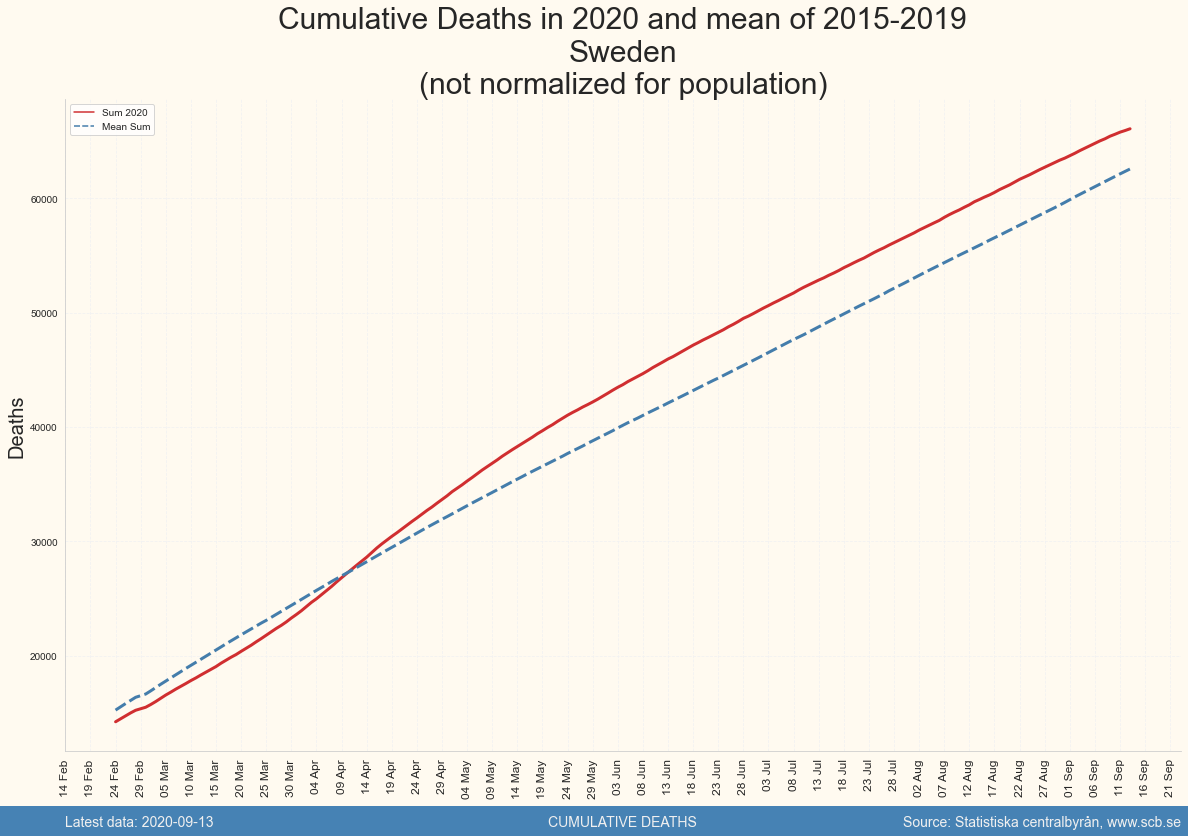

In [42]:
# Plot deaths in 2020 and mean deaths in Sweden per day
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
sns.lineplot(data=swe_death_stats["2020-02-24":], palette=sns.color_palette("Set1", n_colors=2, desat=.8))

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w)

# Set title and axis parameters
plt.title('Cumulative Deaths in 2020 and mean of 2015-2019\nSweden\n(not normalized for population)', size=30)


#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=12)

# The signature bar
offset = 6500
str1 = f"Latest data: {swe_death_stats.index[-1].date()}"
str2 = "Source: Statistiska centralbyrån, www.scb.se"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-offset,
                    s = "CUMULATIVE DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_sweden_death_stats" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

In [43]:
swe_death_stats.tail()

Sum 2020  Mean Sum
Datum                         
2020-09-09     65415     61684
2020-09-10     65586     61900
2020-09-11     65769     62123
2020-09-12     65910     62342
2020-09-13     66066     62553

In [44]:
swe_death_compare = pd.read_csv("swe_death_compare.csv", sep=";", parse_dates=["Datum"], index_col=["Datum"])

In [45]:
swe_death_compare.tail()

2015  2016  2017  2018  2019  2020
Datum                                         
2020-09-09   209   241   233   212   233   225
2020-09-10   228   194   237   222   201   171
2020-09-11   228   199   242   228   220   183
2020-09-12   246   203   202   216   229   141
2020-09-13   211   207   223   214   199   156

In [46]:
swe_death_compare.loc[:,"2015":"2019"].tail()

2015  2016  2017  2018  2019
Datum                                   
2020-09-09   209   241   233   212   233
2020-09-10   228   194   237   222   201
2020-09-11   228   199   242   228   220
2020-09-12   246   203   202   216   229
2020-09-13   211   207   223   214   199

In [47]:
swe_death_compare["Mean 2015 2019"] = swe_death_compare.loc[:, "2015":"2019"].mean(axis=1)

In [48]:
swe_death_compare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2020-01-01 to 2020-09-13
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2015            256 non-null    int64  
 1   2016            256 non-null    int64  
 2   2017            256 non-null    int64  
 3   2018            256 non-null    int64  
 4   2019            256 non-null    int64  
 5   2020            256 non-null    int64  
 6   Mean 2015 2019  256 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 16.0 KB


In [49]:
## DEPRACETED - NEW VERSION FURTHER DOWN

"""
# Plot deaths in 2020 and mean deaths in Sweden per day
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Set color palette and background color
#color_pal = ["grey", "grey", "grey", "grey", "grey", "red"]
color_pal = ["red", "grey"]

fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)


# Plot per country
#sns.lineplot(data=swe_death_compare, palette=sns.color_palette("Set1", n_colors=6, desat=.8), alpha=.7)
sns.lineplot(data=swe_death_compare.loc[:"2020-10-01", "2020":], palette=sns.color_palette(color_pal, n_colors=2), alpha=.7)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
##ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w/2)
    ax.lines[l].set_linestyle("-")
ax.lines[0].set_linewidth((l_w/2)+1)
#ax.lines[5].set_color("black")

# Fix legend
handles, labels = ax.get_legend_handles_labels()
#handles[5].set_color("black")
ax.legend(handles=handles, labels=labels)    

# Set title and axis parameters
plt.title('Daily Deaths 2015-2020\nSweden\n(not normalized for population)', size=30)


#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=12)

# The signature bar
offset = 35
str1 = f"Latest data: {swe_death_stats.index[-1].date()}"
str2 = "Source: Statistiska centralbyrån, www.scb.se"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-offset,
                    s = "DEATHS PER DAY", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_sweden_death_compare" + ".png"
#plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()
"""
print()

In [50]:
scandic_deaths_df["2020-03-20":].head(20)

Country  Deaths  Deaths per capita  Deaths per 100k  Increase  \
Date                                                                       
2020-03-20  Sweden      38           0.003755         0.375485       8.0   
2020-03-21  Sweden      49           0.004842         0.484178      11.0   
2020-03-22  Sweden      60           0.005929         0.592871      11.0   
2020-03-23  Sweden      81           0.008004         0.800376      21.0   
2020-03-24  Sweden     103           0.010178         1.017762      22.0   
2020-03-25  Sweden     134           0.013241         1.324079      31.0   
2020-03-26  Sweden     166           0.016403         1.640277      32.0   
2020-03-27  Sweden     201           0.019861         1.986119      35.0   
2020-03-28  Sweden     239           0.023616         2.361604      38.0   
2020-03-29  Sweden     284           0.028063         2.806257      45.0   
2020-03-30  Sweden     332           0.032806         3.280554      48.0   
2020-03-31  Sweden     385           0.038043         3.804257      53.0   
2020-04-01  Sweden     455           0.044959         4.495940      70.0   
2020-04-02  Sweden     535           0.052864         5.286435      80.0   
2020-04-03  Sweden     605           0.059781         5.978118      70.0   
2020-04-04  Sweden     690           0.068180         6.818019      85.0   
2020-04-05  Sweden     780           0.077073         7.707326      90.0   
2020-04-06  Sweden     864           0.085373         8.537345      84.0   
2020-04-07  Sweden     979           0.096737         9.673682     115.0   
2020-04-08  Sweden    1065           0.105235        10.523464      86.0   

             Rolling7  Rolling30  logDeaths  
Date                                         
2020-03-20   5.000000   1.266667   3.637586  
2020-03-21   6.285714   1.633333   3.891820  
2020-03-22   7.571429   2.000000   4.094345  
2020-03-23  10.428571   2.700000   4.394449  
2020-03-24  12.714286   3.433333   4.634729  
2020-03-25  16.142857   4.466667   4.897840  
2020-03-26  19.428571   5.533333   5.111988  
2020-03-27  23.285714   6.700000   5.303305  
2020-03-28  27.142857   7.966667   5.476464  
2020-03-29  32.000000   9.466667   5.648974  
2020-03-30  35.857143  11.066667   5.805135  
2020-03-31  40.285714  12.833333   5.953243  
2020-04-01  45.857143  15.166667   6.120297  
2020-04-02  52.714286  17.833333   6.282267  
2020-04-03  57.714286  20.166667   6.405228  
2020-04-04  64.428571  23.000000   6.536692  
2020-04-05  70.857143  26.000000   6.659294  
2020-04-06  76.000000  28.800000   6.761573  
2020-04-07  84.857143  32.633333   6.886532  
2020-04-08  87.142857  35.500000   6.970730

In [51]:
"""
# Plot daily new deaths
fig, ax = plt.subplots(figsize=(20,12))

#x_dates = scandic_deaths_df[from_date:].index.strftime('%d %b')

# Plot per country
sns.barplot(x=scandic_deaths_df[from_date:].index, y="Increase", data=scandic_deaths_df[from_date:], palette=sns.color_palette("Set1", n_colors=num_countries, desat=.8), hue="Country")

# Set xticks location and format
x_dates = scandic_deaths_df[from_date:].index.strftime('%d %b').unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='center')
#ax2.set_xticklabels(labels=x_dates, rotation=45, ha='center')

# Set title and axis parameters
plt.title('Daily deaths of Coronavirus\nScandinavia', size=30)

ax.xaxis.label.set_visible(False)
plt.ylabel('Deaths', size=20)

# Format xticks
plt.xticks(rotation=90, size=15)

# The signature bar
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
print(ax.get_ylim())
print(ax.get_xlim())
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/8,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1]*60)

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/8,
                    s = "DAILY DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/8,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")


# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_daily_deaths" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight")
plt.show()
"""
print()

In [52]:
scandic_deaths_df["2020-10-28":].tail(15)

Country  Deaths  Deaths per capita  Deaths per 100k  Increase  \
Date                                                                        
2020-11-03  Denmark     728           0.125926        12.592563       4.0   
2020-11-04  Denmark     729           0.126099        12.609861       1.0   
2020-11-05  Denmark     733           0.126791        12.679051       4.0   
2020-11-06  Denmark     738           0.127655        12.765538       5.0   
2020-11-07  Denmark     740           0.128001        12.800133       2.0   
2020-11-08  Denmark     743           0.128520        12.852025       3.0   
2020-11-09  Denmark     747           0.129212        12.921215       4.0   
2020-11-10  Denmark     750           0.129731        12.973108       3.0   
2020-11-11  Denmark     753           0.130250        13.025000       3.0   
2020-11-12  Denmark     755           0.130596        13.059595       2.0   
2020-11-13  Denmark     756           0.130769        13.076892       1.0   
2020-11-14  Denmark     757           0.130942        13.094190       1.0   
2020-11-15  Denmark     760           0.131461        13.146082       3.0   
2020-11-16  Denmark     764           0.132153        13.215272       4.0   
2020-11-17  Denmark     768           0.132845        13.284462       4.0   

            Rolling7  Rolling30  logDeaths  
Date                                        
2020-11-03  2.714286   2.333333   6.590301  
2020-11-04  2.000000   2.333333   6.591674  
2020-11-05  2.428571   2.333333   6.597146  
2020-11-06  2.714286   2.500000   6.603944  
2020-11-07  2.714286   2.500000   6.606650  
2020-11-08  2.857143   2.600000   6.610696  
2020-11-09  3.285714   2.666667   6.616065  
2020-11-10  3.142857   2.700000   6.620073  
2020-11-11  3.428571   2.733333   6.624065  
2020-11-12  3.142857   2.700000   6.626718  
2020-11-13  2.571429   2.700000   6.628041  
2020-11-14  2.428571   2.666667   6.629363  
2020-11-15  2.428571   2.766667   6.633318  
2020-11-16  2.428571   2.833333   6.638568  
2020-11-17  2.571429   2.933333   6.643790

In [63]:
# Plot daily new deaths and rolling average
fig= plt.figure(figsize=(20,12), dpi=600)

tmp_date = from_date

# Create dates for x-axis
x_dates = scandic_deaths_df[from_date:].index.strftime('%d %b') #.unique()

# Add subplot
ax = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
#ax3 = fig.add_subplot(111)

# Set background color
fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)

# Plot per country
ax = sns.lineplot(x=x_dates, y="Rolling7", data=scandic_deaths_df[from_date:], sort=False, palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country", linestyle="--")
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Increase', fontsize=16)

#ax3 = sns.lineplot(x=x_dates, y="Rolling30", data=scandic_deaths_df[from_date:], sort=False, palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country", linestyle="-.")

ax2 = sns.barplot(x=x_dates, y="Increase", data=scandic_deaths_df[from_date:], palette=sns.color_palette("Set1", n_colors=3, desat=.8), hue="Country", linewidth=0) #edgecolor="none")

# Set the linestyle
for l in range(len(ax.lines)):
    ax.lines[l].set_linestyle("--")
    ax.lines[l].set_linewidth(l_w)
    

# Fix legend
handles, labels = ax.get_legend_handles_labels()
#print(*handles)
handles.pop(1)
handles.pop(1)
handles.append(handles[0])
handles.pop(0)
labels = labels[3:]
labels.append("7 day rolling average")
handles[3].set_color("black")
ax.legend(handles=handles, labels=labels)

# Fix the list of dates so it works with MultipleLocator
date_jump = 5
x_date_ticks = []
for i in range(date_jump):
    x_date_ticks.append(0)

x_date_ticks.extend(x_dates)
#print(x_date_ticks)

# Set xticks location and format
ax.xaxis.set_major_locator(MultipleLocator(base=5))
ax.set_xticklabels(labels=x_date_ticks[0::date_jump], rotation=90, ha='center', size=10)


# Set title and axis parameters
plt.title('Daily deaths with Coronavirus\nScandinavia', size=30)

ax.xaxis.label.set_visible(False)
plt.ylim(bottom=0)

# The signature bar
offset = 9
str1 = f"Latest data: {scandic_df.index[-1].date()}"
str2 = "Source: CSSE at Johns Hopkins University"
#print(ax.get_ylim())
#print(ax.get_xlim())
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1]*80)

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = "DAILY DEATHS", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-ax.get_ylim()[1]/offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")


# Save as jpg and show plot
fname = str(datetime.date.today()) + "_scandinavia_daily_deaths" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

19880.0
46500.0
-13.488888888888889


In [54]:
# Set locale to Swedish to read name of months
locale.setlocale(locale.LC_TIME, "sv_SE.UTF-8")

# Read in preliminary death data from SCB
url = "https://scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/"
scb_deaths = pd.read_excel(url, sheet_name="Tabell 1", parse_dates=True)

# Drop unused rows and columns
scb_deaths.drop(range(5), inplace=True)
scb_deaths = scb_deaths.iloc[:-1, :-6]

# Set header to years
new_header = scb_deaths.iloc[0] #grab the first row for the header

for i, x in enumerate(new_header):
    if isinstance(x, float):
        new_header[i] = str(int(x))

scb_deaths = scb_deaths[1:] #take the data less the header row
scb_deaths.columns = new_header #set the header row as the df header

# Drop leap year dates
scb_deaths = scb_deaths[scb_deaths["DagMånad"] != "29 februari"]

# Convert the dates to date time
scb_deaths["DagMånad"] = pd.to_datetime(scb_deaths["DagMånad"], format="%d %B", errors="coerce")

# Fix incorrect data types
scb_deaths.loc[:, "2015":] = scb_deaths.loc[:, "2015":].astype(int)
#scb_deaths["2015-2019"] = scb_deaths["2015-2019"].astype(float)

# Set index to date column
scb_deaths.set_index("DagMånad", inplace=True)

# Drop last two unused columns
#scb_deaths.drop(["-", "Sort"], axis=1, inplace=True)

In [55]:
print(new_header)
for i, x in enumerate(new_header):
    print(f"{i}: {x}", type(x))


Unnamed: 0     DagMånad
Unnamed: 1         2015
Unnamed: 2         2016
Unnamed: 3         2017
Unnamed: 4         2018
Unnamed: 5         2019
Unnamed: 6         2020
Unnamed: 7    2015-2019
Name: 5, dtype: object
0: DagMånad <class 'str'>
1: 2015 <class 'str'>
2: 2016 <class 'str'>
3: 2017 <class 'str'>
4: 2018 <class 'str'>
5: 2019 <class 'str'>
6: 2020 <class 'str'>
7: 2015-2019 <class 'str'>


In [56]:
scb_deaths.loc[:"1900-10-15", :].iloc[:, 5:]

5           2020  2015-2019
DagMånad                   
1900-01-01   254        290
1900-01-02   301        289
1900-01-03   256        290
1900-01-04   273        277
1900-01-05   265        279
...          ...        ...
1900-10-11   192        239
1900-10-12   230        237
1900-10-13   222        224
1900-10-14   243        240
1900-10-15   255        224

[288 rows x 2 columns]

In [57]:
scb_deaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1900-01-01 to 1900-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   2015       365 non-null    int64
 1   2016       365 non-null    int64
 2   2017       365 non-null    int64
 3   2018       365 non-null    int64
 4   2019       365 non-null    int64
 5   2020       365 non-null    int64
 6   2015-2019  365 non-null    int64
dtypes: int64(7)
memory usage: 32.8 KB


In [58]:
norm_pct = 1.03418
scb_deaths["Mean norm"] = scb_deaths["2015-2019"] * norm_pct
scb_deaths.head()

5           2015  2016  2017  2018  2019  2020  2015-2019  Mean norm
DagMånad                                                            
1900-01-01   295   245   339   275   300   254        290  299.91220
1900-01-02   272   272   317   312   276   301        289  298.87802
1900-01-03   281   293   310   295   271   256        290  299.91220
1900-01-04   256   260   305   285   282   273        277  286.46786
1900-01-05   268   260   304   291   275   265        279  288.53622

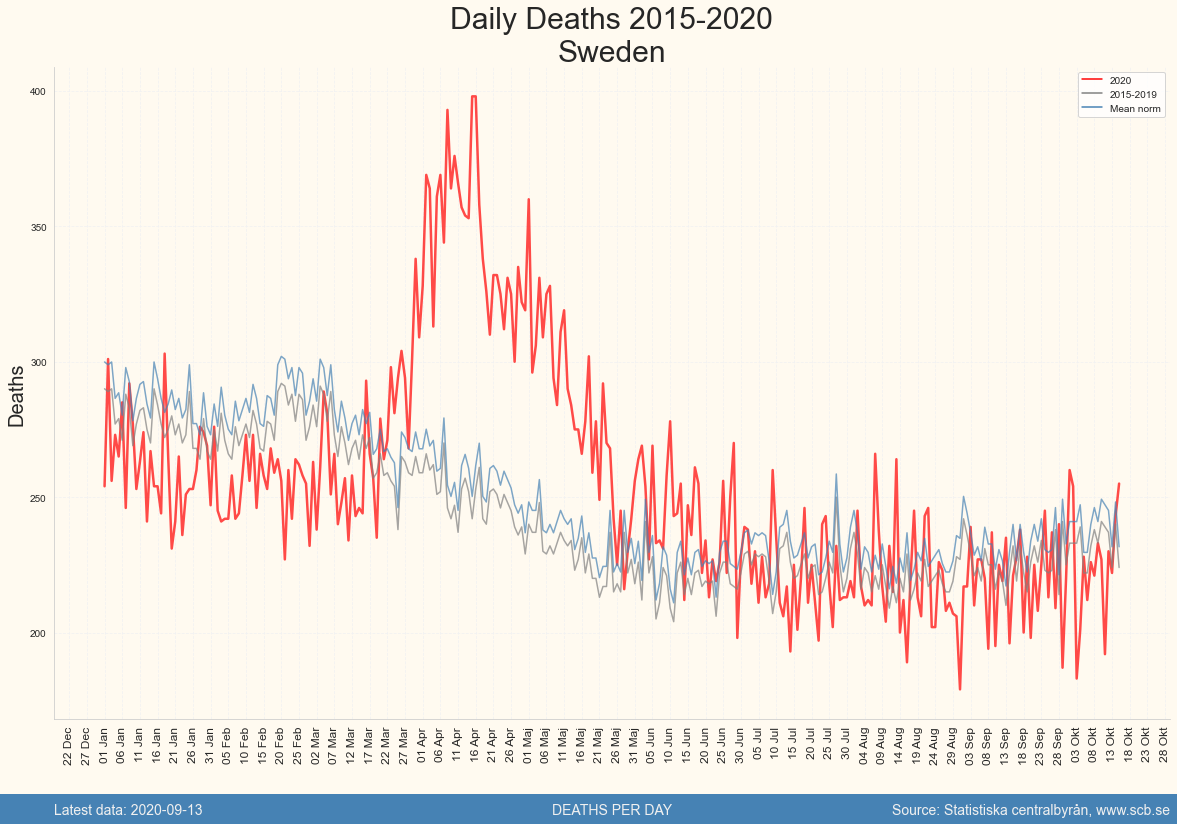

In [59]:
# Plot deaths in 2020 and mean deaths in Sweden per day
fig, ax = plt.subplots(figsize=(20,12))
textstr = ""

# Set color palette and background color
#color_pal = ["grey", "grey", "grey", "grey", "grey", "red"]
color_pal = ["red", "grey", "steelblue"]

fig.patch.set_facecolor(bg_col)
ax.patch.set_facecolor(bg_col)


# Plot per country
#sns.lineplot(data=swe_death_compare, palette=sns.color_palette("Set1", n_colors=6, desat=.8), alpha=.7)
sns.lineplot(data=scb_deaths.loc[:"1900-10-15", :].iloc[:, 5:], palette=sns.color_palette(color_pal, n_colors=3), alpha=.7)

# Set xticks location and format
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
##ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'));

# Set the linewidth
for l in range(len(ax.lines)):
    ax.lines[l].set_linewidth(l_w/2)
    ax.lines[l].set_linestyle("-")
ax.lines[0].set_linewidth((l_w/2)+1)
#ax.lines[5].set_color("black")

# Fix legend
handles, labels = ax.get_legend_handles_labels()
#handles[5].set_color("black")
ax.legend(handles=handles, labels=labels)    

# Set title and axis parameters
plt.title("Daily Deaths 2015-2020\nSweden", size=30)


#plt.xlabel('Date', size=20)
ax.xaxis.label.set_visible(False)
plt.ylabel("Deaths", size=20)

# Format xticks
plt.xticks(rotation=90, size=12)

# The signature bar
offset = 35
str1 = f"Latest data: {swe_death_stats.index[-1].date()}"
str2 = "Source: Statistiska centralbyrån, www.scb.se"
signature = ax.text(x = ax.get_xlim()[0], y = ax.get_ylim()[0]-offset,
                    s = str1, fontsize = 14, color = "#f0f0f0",
                    backgroundcolor = "steelblue")
bb = signature.get_bbox_patch()
bb.set_boxstyle("ext", pad=0.6, width=ax.get_xlim()[1])

middle = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x = middle, y = ax.get_ylim()[0]-offset,
                    s = "DEATHS PER DAY", fontsize = 14, color = "#f0f0f0",
                    ha="center", backgroundcolor = "steelblue")
ax.text(x = ax.get_xlim()[1], y = ax.get_ylim()[0]-offset,
                    s = str2, fontsize = 14, color = "#f0f0f0",
                    ha="right", backgroundcolor = "steelblue")

# Save as jpg and show plot
fname = str(datetime.date.today()) + "_sweden_death_compare" + ".png"
plt.savefig(fname, format="png", dpi="figure", bbox_inches="tight", facecolor=fig.get_facecolor())
sns.despine()
plt.show()

In [60]:
import pandas_profiling
from pivottablejs import pivot_ui
from pydqc import distribution_compare_pretty

ModuleNotFoundError: No module named 'pydqc'

In [166]:
pandas_profiling.ProfileReport(scb_deaths).to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 78.51it/s]


In [168]:
pivot_ui(scb_deaths)